In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('D:\wine-clustering.csv')
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
correlation_matrix = data.corr()
print(correlation_matrix)

                       Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  \
Alcohol               1.000000    0.094397  0.211545     -0.310235   0.270798   
Malic_Acid            0.094397    1.000000  0.164045      0.288500  -0.054575   
Ash                   0.211545    0.164045  1.000000      0.443367   0.286587   
Ash_Alcanity         -0.310235    0.288500  0.443367      1.000000  -0.083333   
Magnesium             0.270798   -0.054575  0.286587     -0.083333   1.000000   
Total_Phenols         0.289101   -0.335167  0.128980     -0.321113   0.214401   
Flavanoids            0.236815   -0.411007  0.115077     -0.351370   0.195784   
Nonflavanoid_Phenols -0.155929    0.292977  0.186230      0.361922  -0.256294   
Proanthocyanins       0.136698   -0.220746  0.009652     -0.197327   0.236441   
Color_Intensity       0.546364    0.248985  0.258887      0.018732   0.199950   
Hue                  -0.071747   -0.561296 -0.074667     -0.273955   0.055398   
OD280                 0.0723

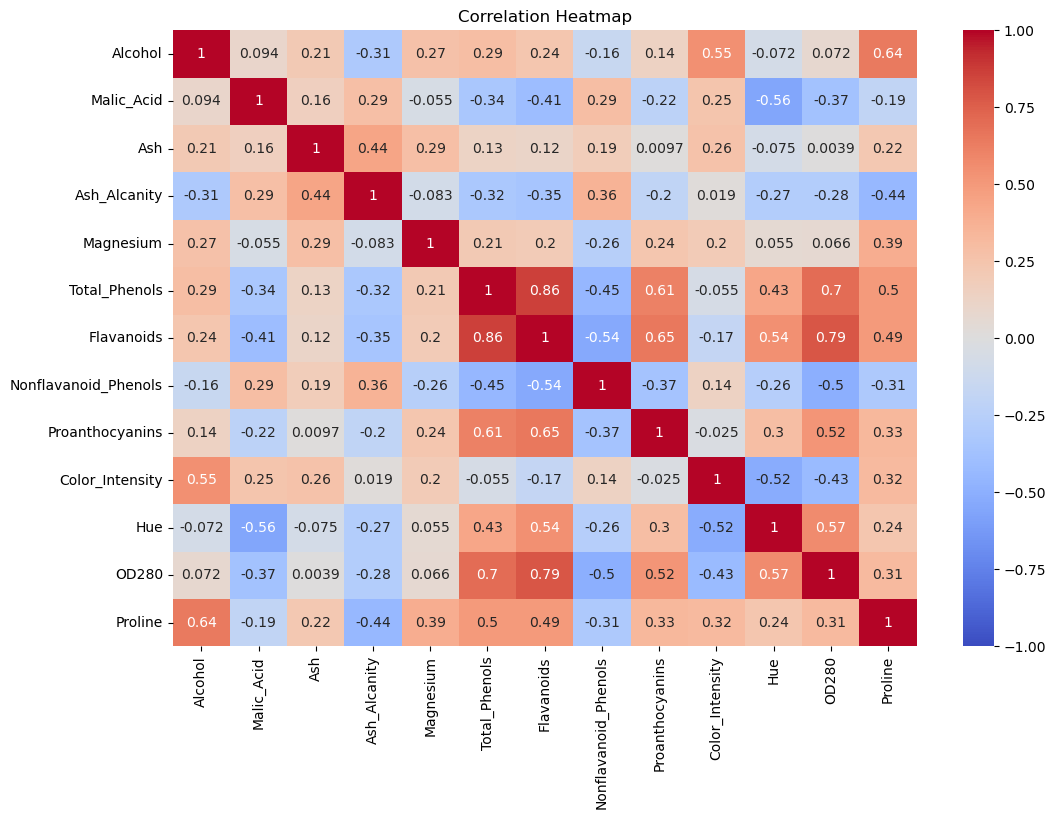

In [4]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [5]:
columns_to_drop = ['Total_Phenols', 'OD280', 'Proline', 'Proanthocyanins']
data = data.drop(columns=columns_to_drop)
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Flavanoids,Nonflavanoid_Phenols,Color_Intensity,Hue
0,14.23,1.71,2.43,15.6,127,3.06,0.28,5.64,1.04
1,13.20,1.78,2.14,11.2,100,2.76,0.26,4.38,1.05
2,13.16,2.36,2.67,18.6,101,3.24,0.30,5.68,1.03
3,14.37,1.95,2.50,16.8,113,3.49,0.24,7.80,0.86
4,13.24,2.59,2.87,21.0,118,2.69,0.39,4.32,1.04


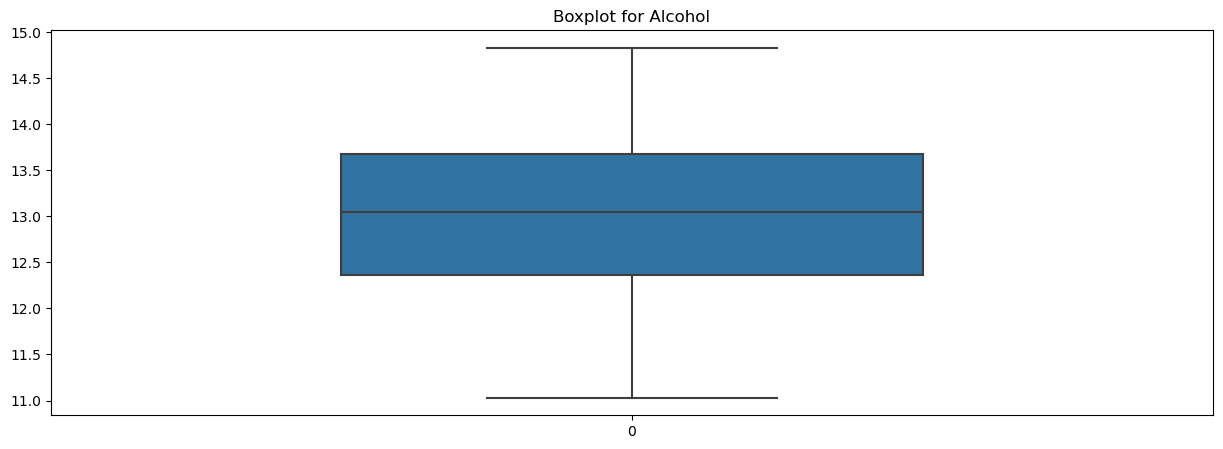

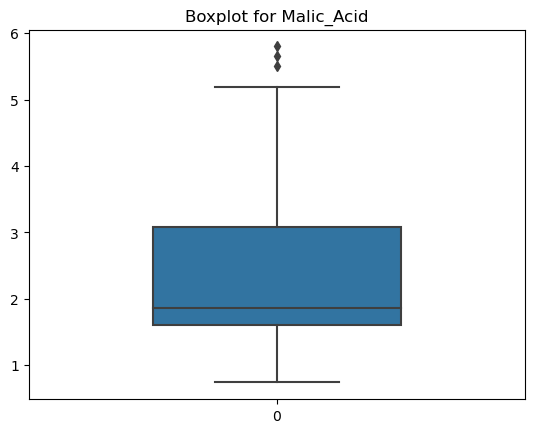

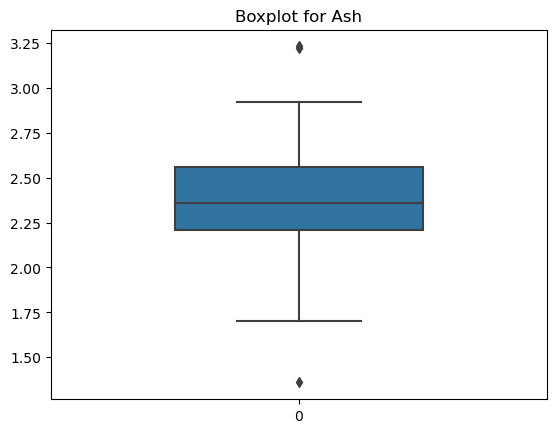

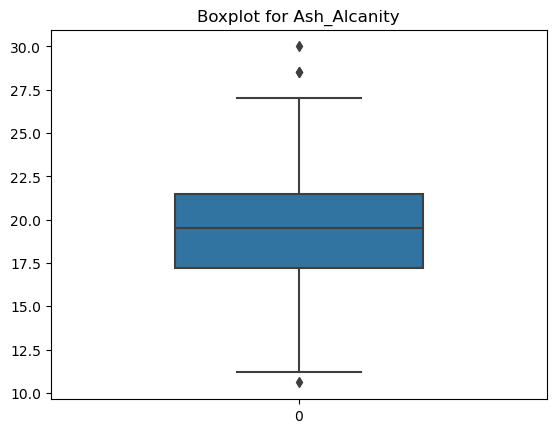

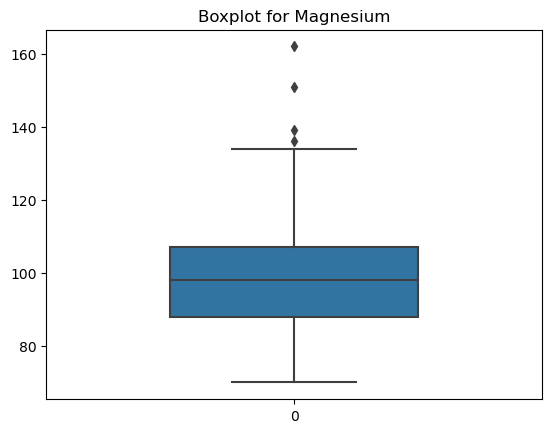

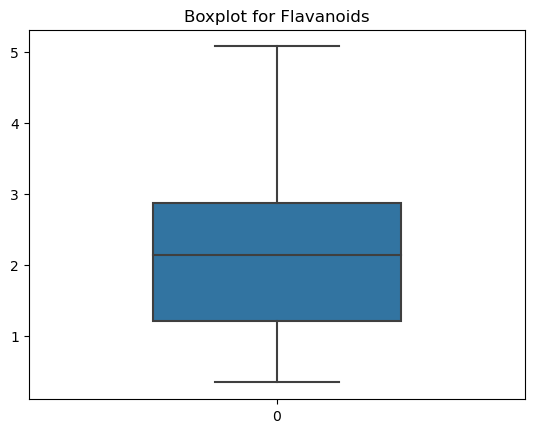

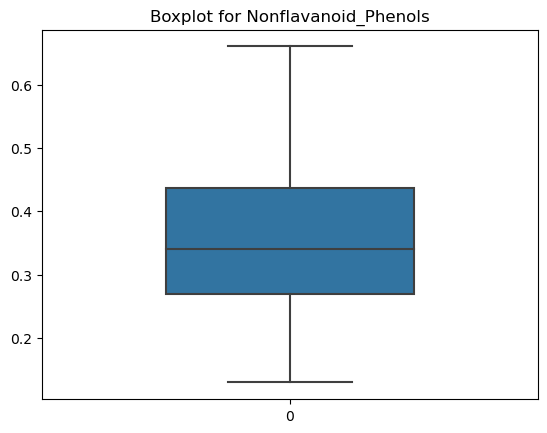

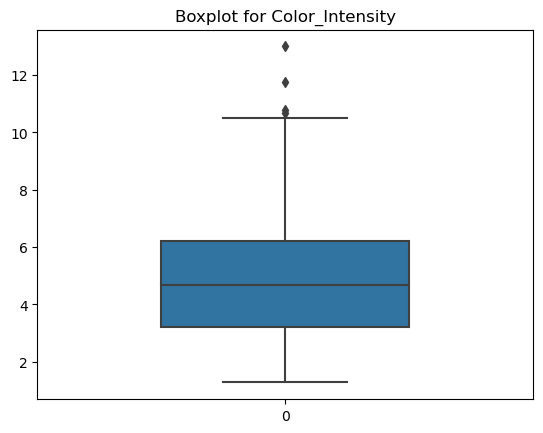

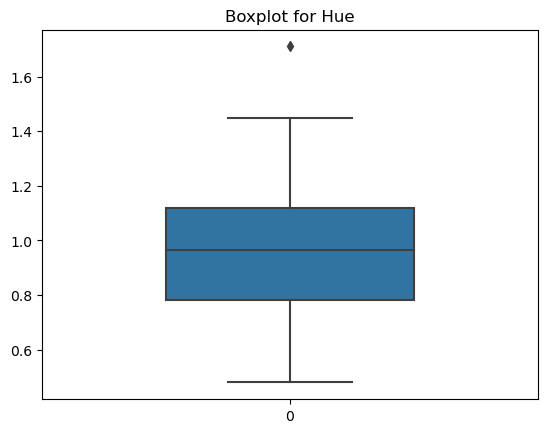

In [6]:
plt.figure(figsize=(15, 5))
for column in data.columns:
    sns.boxplot(data[column], orient='v', width=0.5)
    plt.title(f'Boxplot for {column}')
    plt.show()

In [7]:
from scipy.stats import zscore
features = ['Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Color_Intensity', 'Hue']
for feature in features:
    # Compute Z-scores for the current feature
    z_scores = zscore(data[feature])
    threshold = 3
    outliers = data[feature][np.abs(z_scores) > threshold]
    
    # Replace outliers with the mean value of the feature
    data.loc[data[feature].isin(outliers), feature] = data[feature].mean()
print(data)


     Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Flavanoids  \
0      14.23        1.71  2.43          15.6      127.0        3.06   
1      13.20        1.78  2.14          11.2      100.0        2.76   
2      13.16        2.36  2.67          18.6      101.0        3.24   
3      14.37        1.95  2.50          16.8      113.0        3.49   
4      13.24        2.59  2.87          21.0      118.0        2.69   
..       ...         ...   ...           ...        ...         ...   
173    13.71        5.65  2.45          20.5       95.0        0.61   
174    13.40        3.91  2.48          23.0      102.0        0.75   
175    13.27        4.28  2.26          20.0      120.0        0.69   
176    13.17        2.59  2.37          20.0      120.0        0.68   
177    14.13        4.10  2.74          24.5       96.0        0.76   

     Nonflavanoid_Phenols  Color_Intensity   Hue  
0                    0.28             5.64  1.04  
1                    0.26             4.38  1

In [8]:
print(data[features].describe())

       Malic_Acid         Ash  Ash_Alcanity   Magnesium  Color_Intensity  \
count  178.000000  178.000000    178.000000  178.000000       178.000000   
mean     2.316890    2.362526     19.435927   99.103838         5.013472   
std      1.086212    0.247381      3.244334   12.916547         2.239665   
min      0.740000    1.700000     10.600000   70.000000         1.280000   
25%      1.602500    2.212500     17.200000   88.000000         3.220000   
50%      1.865000    2.360000     19.497472   98.000000         4.690000   
75%      3.030000    2.540000     21.500000  107.000000         6.182500   
max      5.650000    2.920000     28.500000  139.000000        11.750000   

              Hue  
count  178.000000  
mean     0.953222  
std      0.221421  
min      0.480000  
25%      0.782500  
50%      0.960000  
75%      1.120000  
max      1.450000  


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[data.columns] = scaler.fit_transform(data)
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Flavanoids,Nonflavanoid_Phenols,Color_Intensity,Hue
0,0.842105,0.197556,0.598361,0.279330,0.826087,0.573840,0.283019,0.416428,0.577320
1,0.571053,0.211813,0.360656,0.033520,0.434783,0.510549,0.245283,0.296084,0.587629
2,0.560526,0.329939,0.795082,0.446927,0.449275,0.611814,0.320755,0.420248,0.567010
3,0.878947,0.246436,0.655738,0.346369,0.623188,0.664557,0.207547,0.622732,0.391753
4,0.581579,0.376782,0.959016,0.581006,0.695652,0.495781,0.490566,0.290353,0.577320


C:\Users\Suriya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Suriya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Suriya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Suriya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

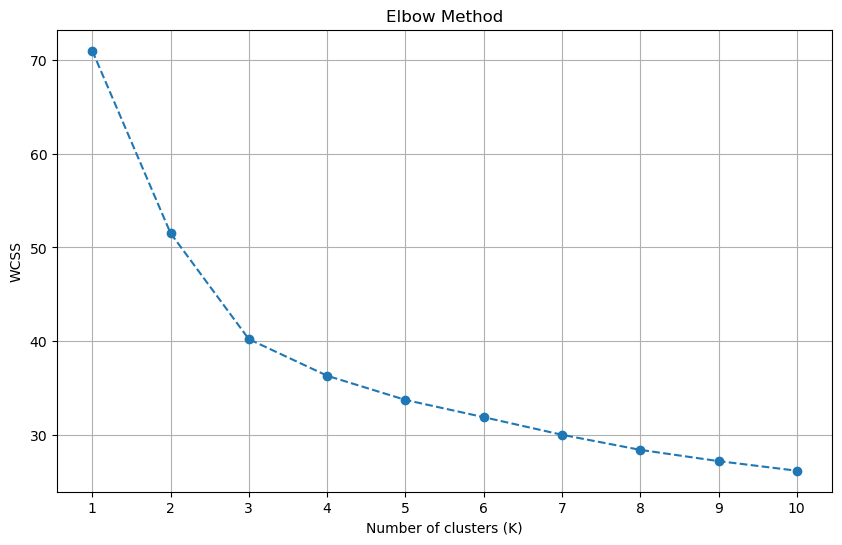

In [10]:
wcss = []  # Within-Cluster-Sum-of-Squares

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [11]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data)

# Add the cluster labels to the original data
data['Cluster'] = clusters
data

C:\Users\Suriya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Suriya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Flavanoids,Nonflavanoid_Phenols,Color_Intensity,Hue,Cluster
0,0.842105,0.197556,0.598361,0.279330,0.826087,0.573840,0.283019,0.416428,0.577320,1
1,0.571053,0.211813,0.360656,0.033520,0.434783,0.510549,0.245283,0.296084,0.587629,1
2,0.560526,0.329939,0.795082,0.446927,0.449275,0.611814,0.320755,0.420248,0.567010,1
3,0.878947,0.246436,0.655738,0.346369,0.623188,0.664557,0.207547,0.622732,0.391753,1
4,0.581579,0.376782,0.959016,0.581006,0.695652,0.495781,0.490566,0.290353,0.577320,1
...,...,...,...,...,...,...,...,...,...,...
173,0.705263,1.000000,0.614754,0.553073,0.362319,0.056962,0.735849,0.613181,0.164948,2
174,0.623684,0.645621,0.639344,0.692737,0.463768,0.086498,0.566038,0.574976,0.226804,2
175,0.589474,0.720978,0.459016,0.525140,0.724638,0.073840,0.566038,0.851958,0.113402,2
176,0.563158,0.376782,0.549180,0.525140,0.724638,0.071730,0.754717,0.765998,0.123711,2


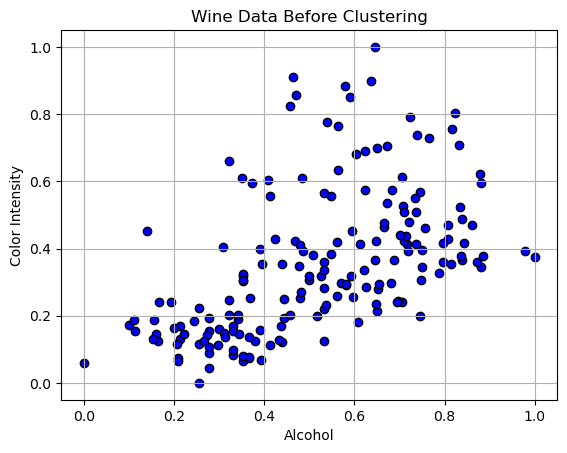

In [12]:
# Visualize the data (for simplicity, consider plotting only a subset of features)
plt.scatter(data['Alcohol'], data['Color_Intensity'], c='blue', marker='o', edgecolors='k')
plt.title('Wine Data Before Clustering')
plt.xlabel('Alcohol')
plt.ylabel('Color Intensity')
plt.grid(True)
plt.show()


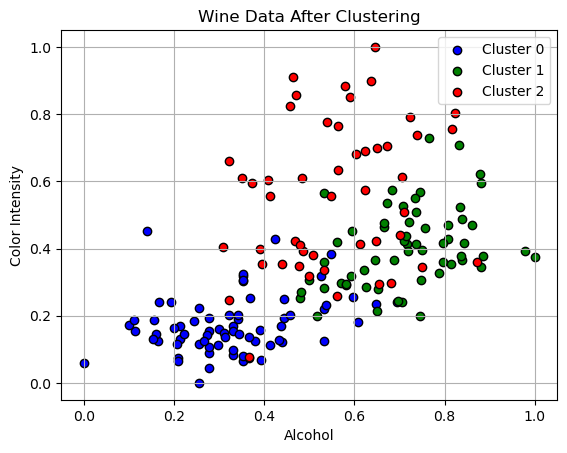

In [13]:
colors = ['blue', 'green', 'red']

for i in range(optimal_k):
    cluster_data = data[data['Cluster'] == i]
    plt.scatter(cluster_data['Alcohol'], cluster_data['Color_Intensity'], c=colors[i], marker='o', edgecolors='k', label=f'Cluster {i}')
    
plt.title('Wine Data After Clustering')
plt.xlabel('Alcohol')
plt.ylabel('Color Intensity')
plt.legend()
plt.grid(True)
plt.show()


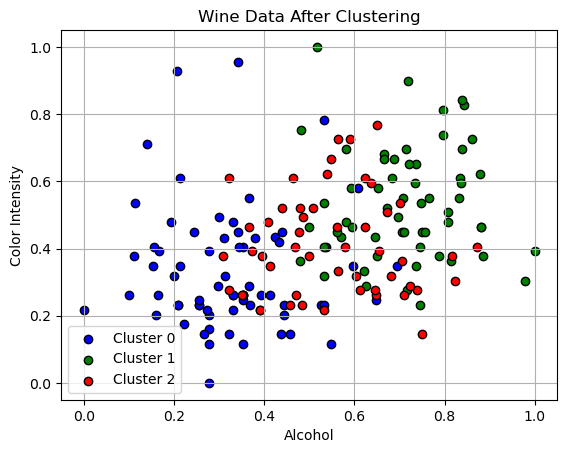

In [14]:
colors = ['blue', 'green', 'red']

for i in range(optimal_k):
    cluster_data = data[data['Cluster'] == i]
    plt.scatter(cluster_data['Alcohol'], cluster_data['Magnesium'], c=colors[i], marker='o', edgecolors='k', label=f'Cluster {i}')
    
plt.title('Wine Data After Clustering')
plt.xlabel('Alcohol')
plt.ylabel('Color Intensity')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
from sklearn.metrics import silhouette_score
# Compute silhouette score
silhouette_avg = silhouette_score(data, clusters)
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.5249


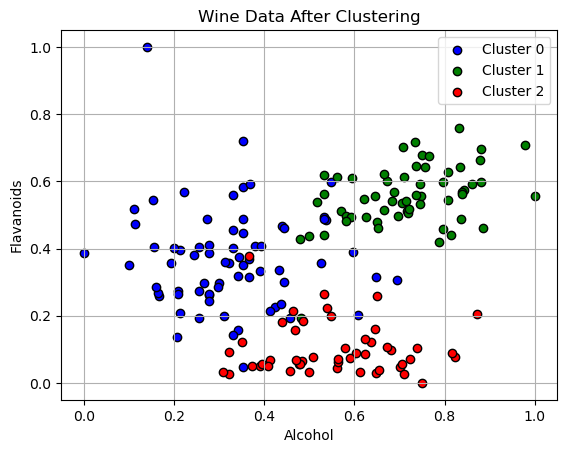

In [22]:
for i in range(optimal_k):
    cluster_data = data[data['Cluster'] == i]
    plt.scatter(cluster_data['Alcohol'], cluster_data['Flavanoids'], c=colors[i], marker='o', edgecolors='k', label=f'Cluster {i}')
    
plt.title('Wine Data After Clustering')
plt.xlabel('Alcohol')
plt.ylabel('Flavanoids')
plt.legend()
plt.grid(True)
plt.show()

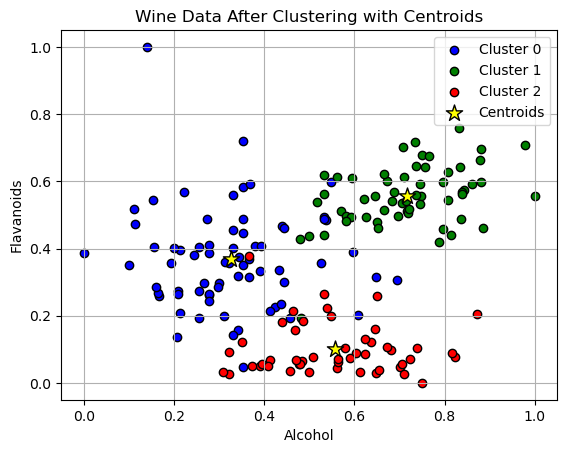

In [25]:
centroids = kmeans.cluster_centers_

# Plot data points for each cluster
for i in range(optimal_k):
    cluster_data = data[data['Cluster'] == i]
    plt.scatter(cluster_data['Alcohol'], cluster_data['Flavanoids'], c=colors[i], marker='o', edgecolors='k', label=f'Cluster {i}')
    
# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 5], c='yellow', marker='*', s=150, edgecolors='k', label='Centroids')

plt.title('Wine Data After Clustering with Centroids')
plt.xlabel('Alcohol')
plt.ylabel('Flavanoids')
plt.legend()
plt.grid(True)
plt.show()